In [41]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [42]:
diabetes_data = pd.read_csv("C:/Users/shrey/OneDrive/Documents/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: title={'center': 'Count (target)'}, xlabel='Outcome'>

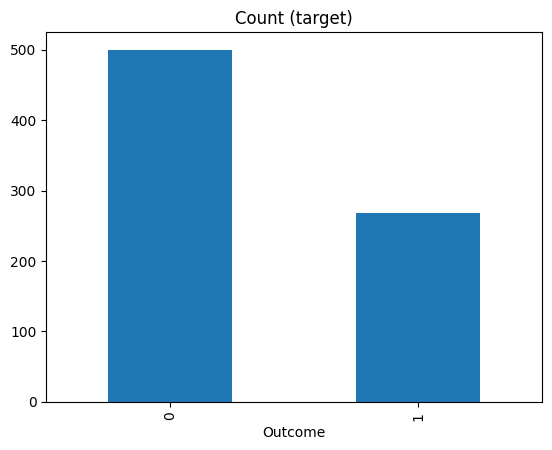

In [44]:
diabetes_data['Outcome'].value_counts().plot(kind='bar', title='Count (target)')

In [45]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [46]:
x = diabetes_data.drop(columns='Outcome', axis=1)
y = diabetes_data['Outcome']


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [48]:
X = x_scaled
y = diabetes_data['Outcome']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [50]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [51]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [52]:
accuracy = classifier.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7662337662337663


In [53]:
x_train_predictions = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_predictions)
print("Training data accuracy:", training_data_accuracy)

Training data accuracy: 0.7719869706840391


In [54]:
input_data = (3,83,58,31,18,34.3,0.336,25)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
Standardized_input_data = scaler.transform(input_data_reshaped)
print(Standardized_input_data)
prediction = classifier.predict(Standardized_input_data)

[[-0.25095213 -1.18599065 -0.57412775  0.65635768 -0.53659845  0.29285624
  -0.41036256 -0.70119842]]


c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:

if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic


In [56]:
import pickle
filename = 'diabetes_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))
